In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
import quandl

In [108]:
#PIPE para baixar os arquivos da plataforma quandl
#quandl.ApiConfig.api_key = "Sua Senha"

#########################################

#Rice_R1=quandl.get("CHRIS/CME_RR1")
#Soy_S1=quandl.get("CHRIS/CME_S1")
#Corn_C1=quandl.get('CHRIS/CME_C1')
#Oats_O1=quandl.get('CHRIS/CME_O1')

#Rice_R1.to_csv('Rice_R1_CME_2020_03_12.csv')
#Soy_S1.to_csv('Soy_S1_CME_2020_03_12.csv')
#Corn_C1.to_csv('Corn_C1_CME_2020_03_12.csv')
#Oats_O1.to_csv('Oats_O1_CME_2020_03_12.csv')

#Zinc=pd.read_csv('ODA_PZINC_USD_2019_11_26.csv', index_col=0)

Rice_R1=pd.read_csv('Rice_R1_CME_2020_03_12.csv',index_col=0)
Soy_S1=pd.read_csv('Soy_S1_CME_2020_03_12.csv', index_col=0)
Corn_C1=pd.read_csv('Corn_C1_CME_2020_03_12.csv', index_col=0)
Oats_O1=pd.read_csv('Oats_O1_CME_2020_03_12.csv', index_col=0)


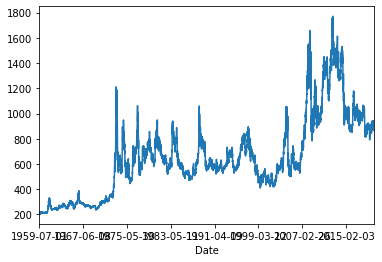

In [109]:
Soy_S1['Settle'].plot()

In [110]:
Soy_S1=Soy_S1['2015':]
Rice_R1=Rice_R1['2015':]
Corn_C1=Corn_C1['2015':]
Oats_O1=Oats_O1['2015':]

In [111]:
Soy_S1.columns=['S_Open', 'S_High', 'S_Low', 'S_Last', 'S_Change', 'S_Settle', 'S_Volume',
       'S_PDOI']
Rice_R1.columns=['R_Open', 'R_High', 'R_Low', 'R_Last', 'R_Change', 'R_Settle', 'R_Volume',
       'R_PDOI']
Corn_C1.columns=['C_Open', 'C_High', 'C_Low', 'C_Last', 'C_Change', 'C_Settle', 'C_Volume',
       'C_PDOI']

Oats_O1.columns=['O_Open', 'O_High', 'O_Low', 'O_Last', 'O_Change', 'O_Settle', 'O_Volume',
       'O_PDOI']


In [112]:
data= pd.concat([Soy_S1, Rice_R1, Corn_C1, Oats_O1], axis=1, sort=False)


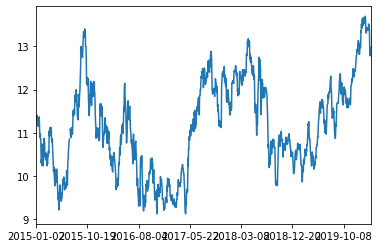

In [113]:
data['R_Settle'].plot()


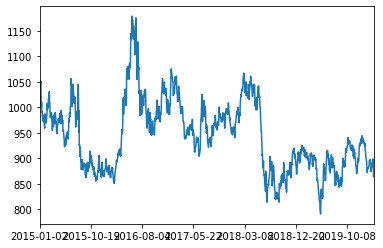

In [114]:
data['S_Settle'].plot()

In [117]:
###Preços na mesma base 100

data['R_Settle_base']=100*data.R_Settle/data.R_Settle[0]
data['S_Settle_base']=100*data.S_Settle/data.S_Settle[0]
data['C_Settle_base']=100*data.C_Settle/data.C_Settle[0]
data['O_Settle_base']=100*data.O_Settle/data.O_Settle[0]

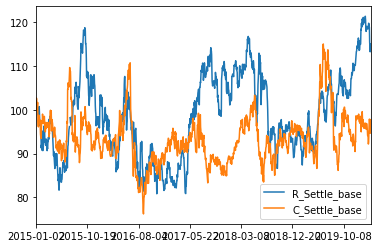

In [122]:
data[['R_Settle_base','C_Settle_base']].plot()

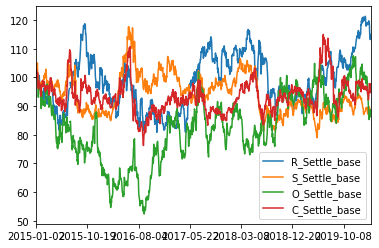

In [120]:
data[['R_Settle_base','S_Settle_base', 'O_Settle_base', 'C_Settle_base']].plot()

In [123]:
data['R_Volume_base']=100*data.R_Volume/data.R_Volume[0]
data['S_Volume_base']=100*data.S_Volume/data.S_Volume[0]
data['C_Volume_base']=100*data.C_Volume/data.C_Volume[0]
data['O_Volume_base']=100*data.O_Volume/data.O_Volume[0]

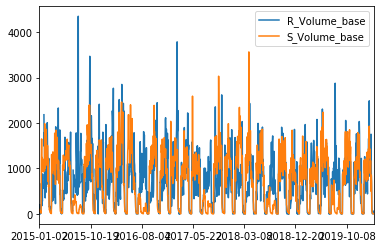

In [149]:
data[['R_Volume_base','S_Volume_base']].plot()

In [166]:
data.index = pd.to_datetime(data.index)

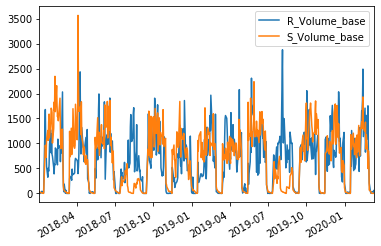

In [167]:
data[['R_Volume_base','S_Volume_base']]['2018':].plot()

<function matplotlib.pyplot.legend(*args, **kwargs)>

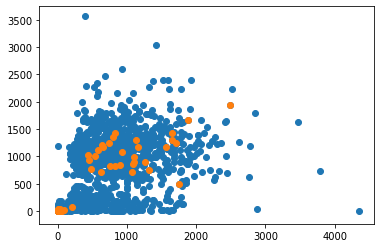

In [177]:
plt.scatter(data.R_Volume_base,data.S_Volume_base)
plt.scatter(data.R_Volume_base['2020':],data.S_Volume_base['2020':])
plt.legend

<function matplotlib.pyplot.legend(*args, **kwargs)>

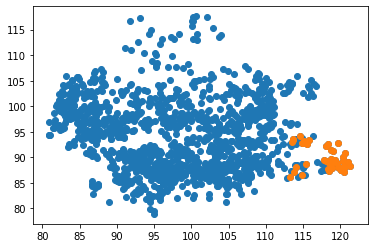

In [178]:
plt.scatter(data.R_Settle_base,data.S_Settle_base)
plt.scatter(data.R_Settle_base['2020':],data.S_Settle_base['2020':])
plt.legend

In [ ]:
####Preços se diferenciam,mas o volume não!

(array([16.,  1.,  1.,  0.,  0.,  3.,  1.,  4.,  0.,  5.,  1.,  1.,  1.,
         5.,  0.,  2.,  0.,  0.,  1.,  2.,  1.,  1.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.]),
 array([1.44927536e+00, 8.43478261e+01, 1.67246377e+02, 2.50144928e+02,
        3.33043478e+02, 4.15942029e+02, 4.98840580e+02, 5.81739130e+02,
        6.64637681e+02, 7.47536232e+02, 8.30434783e+02, 9.13333333e+02,
        9.96231884e+02, 1.07913043e+03, 1.16202899e+03, 1.24492754e+03,
        1.32782609e+03, 1.41072464e+03, 1.49362319e+03, 1.57652174e+03,
        1.65942029e+03, 1.74231884e+03, 1.82521739e+03, 1.90811594e+03,
        1.99101449e+03, 2.07391304e+03, 2.15681159e+03, 2.23971014e+03,
        2.32260870e+03, 2.40550725e+03, 2.48840580e+03]),
 <a list of 30 Patch objects>)

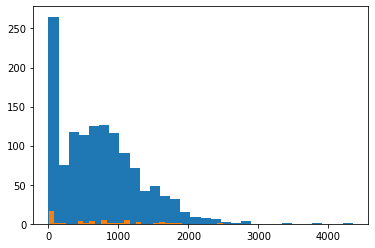

In [183]:
###Histograma dos volumes
plt.hist(data.R_Volume_base, bins=30)
plt.hist(data.R_Volume_base['2020':], bins=30)


(array([1., 3., 1., 1., 0., 1., 2., 2., 2., 1., 0., 0., 0., 0., 0., 0., 0.,
        1., 2., 4., 4., 5., 2., 1., 4., 2., 3., 4., 0., 2.]),
 array([113.19751993, 113.4676705 , 113.73782108, 114.00797166,
        114.27812223, 114.54827281, 114.81842338, 115.08857396,
        115.35872453, 115.62887511, 115.89902569, 116.16917626,
        116.43932684, 116.70947741, 116.97962799, 117.24977857,
        117.51992914, 117.79007972, 118.06023029, 118.33038087,
        118.60053144, 118.87068202, 119.1408326 , 119.41098317,
        119.68113375, 119.95128432, 120.2214349 , 120.49158547,
        120.76173605, 121.03188663, 121.3020372 ]),
 <a list of 30 Patch objects>)

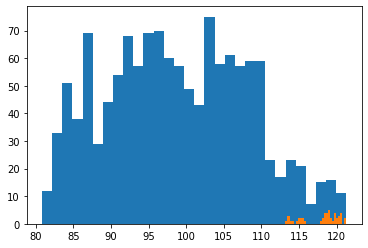

In [184]:
#histograma dos preços
plt.hist(data.R_Settle_base, bins=30)
plt.hist(data.R_Settle_base['2020':], bins=30)


In [ ]:
###Preços estão na calda longa positiva
###Volumes estão bem distribuidos